In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math
sns.set(rc={'figure.figsize':(11.7,8.27)})

# acceleration of gravity on the surface of the earth
G = 9.80665

In [38]:
"""
TODO:
 1. add smart motion graphs - velocity, initial position and time given - DONE
 2. If required variables are not given, then calculate them.
"""

'\nTODO:\n 1. add smart motion graphs - velocity, initial position and time given - DONE\n 2. If required variables are not given, then calculate them.\n'

In [72]:
""" 
    v = speed
    s = distance
    t = time
    a = acceleration
    specify = [
        "p-t" -> position-time graph
        "v-t" -> velocity-time graph
        "a-t" -> acceleration-time graph
    ]
    -------
    all arguments, except specify, are given as series
    ------- 
    TODO: add summary of the graph?
"""
def motion_graph(
        v=[],s=[],t=[],a=[],specify="",  #data
        color="#00aaff" #information about graphs
        ):
    if specify=="p-t":
        draw_graph(s,t,"Position","Time",color)
    elif specify=="v-t":
        draw_graph(v,t,"Velocity","Time",color)
    elif specify=="a-t":
        draw_graph(a,t,"Acceleration","Time",color)
    else:
        raise ValueError("Please specify the type of graph you want. Options are: 'p-t','v-t','a-t'")
# helper function for motion_graph

def draw_graph(series1,series2,ylabel,xlabel,color="#00aaff",line=False):
        # make all arguments pandas.Series
        if not isinstance(series1,pd.Series):
            if isinstance(series1,int) or isinstance(series1,float):
                series1 = calculate_time(series1,50)
            else:
                series1 = pd.Series(va for va in series1)
                
        if not isinstance(series2,pd.Series):
            if isinstance(series2,int) or isinstance(series2,float):
                series2 = calculate_time(series2,50)
            else:
                series2 = pd.Series(v for v in series2)
        # create a dataframe
        df = pd.DataFrame()
        df = df.assign(series1=series1.values)
        df = df.assign(series2=series2.values)
        #plot
        if line:
            g = sns.lineplot(x="series2",y="series1",data=df,color=color);    
        else:
            g = sns.pointplot(x="series2",y="series1",data=df,color=color);    
        g = (g.set(ylabel=ylabel, xlabel=xlabel))    
        

In [40]:
"""
    v = velocity
    vi = initial velocity
    vf = final velocity
    s = position
    si = initial position
    sf = final position
    dt = change in time
    a = acceleration
    specify = [
        "p-t" -> position-time
        "v-t" -> velocity-time
    ]
"""
def smart_motion_graph(
    v=None,vi=None,vf=None,s=None,si=None,sf=None,dt=None,a = None, specify="",freeFall=False,
    color="#00aaff" #information about graphs
    ):
    
    if freeFall==True:
        a=-G
    
    if dt==None and specify:
        raise ValueError("Please specify change in time(dt)")
        
    if specify=="p-t":
        # SCENARIO 1: Uniform motion We have v, si and time. sf = si+v*dt
        if((v!=None or vi!=None) and si!=None and a==None):
            v = vi if v==None else v
            sf = si+v*dt
            #series for all variables
            s_dt = pd.Series(va for va in range(1,dt+1,round(dt*0.1)))
            s_s = pd.Series([],dtype=pd.StringDtype())
            for i in range(0,dt,round(dt*0.1)):
                sf = si+v*i
                s_s.at[sf] = sf            
            draw_graph(s_s,s_dt,"Position","Time",line=True)  
        # SCENARIO 2: Constant acceleration: We have a,vi, si and time. sf = si+vf*dt+0.5*a*(dt)^2
        elif((v!=None or vi!=None) and (si!=None or s!=None) and a!=None):
            vi = vi if v==None else v
            si = si if s==None else s
            vf = vi+a*dt
            s_s = pd.Series([],dtype=pd.StringDtype())
            s_dt = pd.Series(va for va in range(1,dt+1,round(dt*0.1)))
            for i in range(0,dt,round(dt*0.1)):
                sf = si+vi*i+0.5*a*(i**2)                
                s_s.at[sf] = sf
            draw_graph(s_s,s_dt,"Position","Time",line=True,color=color)
        else: 
            raise ValueError("Please provide the necessary arguments. If it's uniform motion then v,si and time. If it's motion with constant acceleration then a,vi,si and time")
    elif specify=="v-t":
        # SCENARIO 1: GIVEN : vi, a, dt. Equation vf = vi+a*dt
        if((v!=None or vi!=None) and a!=None):
            s_dt = pd.Series(va for va in range(1,dt+1,round(dt*0.1)))
            s_v = pd.Series([],dtype=pd.StringDtype())
            for i in range(0,dt,round(dt*0.1)):
                vf = vi+a*i
                s_v.at[vf] = vf            
            draw_graph(s_v,s_dt,"Velocity","Time",line=True,color=color)
        else:
            raise ValueError("Please provide the necessary arguments - vi, a, dt")
    else:
        raise ValueError("Please specify the type of graph you want. Options are: 'v-t','p-t'")

In [41]:
"""
    angle -> 𝜃, launch angle
    vi -> initial velocity
    y -> initial height
    x -> initial x position
    dt -> change in time
    specify -> [
        'y-x' -> graph of y and x positions over time
        'x-t' -> graph of y and x positions over time
        'y-t' -> graph of y and x positions over time
        'v-comp' -> components of velocity
        'vy-t' -> components of velocity
        'vx-t' -> components of velocity
        'ay-t' -> y acceleration against time
        'ax-t' -> x acceleration against time
    ]
"""
def projectile_motion_graph(
    angle = 0, vi = 0, y = 0, x = 0, dt = 0, specify="", radians = False, #basic data
    density = 1.225, drag_coeff = None, #advanced data used for acceleration with drag
    color = "#00aaff"
):
    if not radians:
        angle = math.radians(angle)
        
    dt = (2*vi*math.sin(angle)/G)
    #y component of initial speed
    viy = vi*math.sin(angle)
    #x component of initial speed
    vix = vi*math.cos(angle)

    # empty series for x and y components
    s_y = pd.Series([],dtype=pd.StringDtype())
    s_x = pd.Series([],dtype=pd.StringDtype())

    #series for time
    s_dt = pd.Series([],dtype=pd.StringDtype())
    t_calc = 0
    
    if specify=="y-x" or specify=="x-y":
        # range is the distance projectile travels
        # https://en.wikipedia.org/wiki/Range_of_a_projectile
        
        #each graph will have 100 points, no matter of the time
        s_dt = calculate_time(dt,100)
        
        for time in s_dt:
            y_pos = viy*time-0.5*G*(time**2)
            x_pos = vix*time
            s_y.at[time] = y_pos+y
            s_x.at[time] = x_pos+x
            
        draw_graph(s_y,s_x,"Y","X",line=True,color=color)  
        
    elif specify=="x-t":
        s_dt = calculate_time(dt,100)
        for time in s_dt:
            x_pos = vix*time
            s_x.at[time] = x_pos+x
        draw_graph(s_x,s_dt,"X","Time",line=True,color=color)  
    
    elif specify=="y-t":
        s_dt = calculate_time(dt,100)
        for time in s_dt:
            y_pos = viy*time-0.5*G*(time**2)
            s_y.at[time] = y_pos+y
            
        draw_graph(s_y,s_dt,"Y","Time",line=True,color=color)  
        
    elif specify=="v-comp":
        # v_y at time t is equal to v_iy - G*t
        # v_x is constant since there is no force acting against it
        
        #each graph will have 10 points, no matter of the time
        s_dt = calculate_time(dt,10)
        
        for time in s_dt:
            v_y = viy-G*time
            s_y.at[v_y] = v_y
            s_x.at[time] = vix
        draw_graph(s_y,s_x,"Y component of velocity","X component of velocity",line=True,color=color)  
    elif specify=="vy-t":
        #each graph will have 10 points, no matter of the time
        s_dt = calculate_time(dt,10)
        for time in s_dt:
            v_y = viy-G*time
            s_y.at[v_y] = v_y
            
        draw_graph(s_y,s_dt,"Y component of velocity","Time",line=True,color=color)  
    elif specify=="vx-t":
        s_x = pd.Series((vix for i in range(0,10)))
        s_dt = calculate_time(dt,10)
        draw_graph(s_x,s_dt,"X component of velocity","Time",line=True,color=color)  
    elif specify=="ay-t":
        if drag_coeff==None:
            raise ValueError("Please specify the type of graph you want. Options are: 'y-x','y-t','x-t','v-comp','vy-t','vx-t'")    
        else:
            #advanced_projectile_motion_graph_drag()
            pass
    else:
        raise ValueError("Please specify the type of graph you want. Options are: 'y-x','y-t','x-t','v-comp','vy-t','vx-t'")
        
def calculate_time(dt,length):
    t_calc = 0
    s_dt = pd.Series([],dtype=pd.StringDtype())
    for i in range(0,length):
        t_calc+=dt/(length)
        s_dt.at[t_calc] = t_calc
    return s_dt


def advanced_projectile_motion_graph_drag():
    pass

In [71]:
"""
    ang_v -> angular velocity
    dt -> time
    angle -> "angle swept out in time t" from https://en.wikipedia.org/wiki/Circular_motion
    ang_acc -> angular acceleration
    r -> radius,
    v -> linear velocity,
    a -> linear acceleration,
    T -> period of one rotation,
    cent_acc -> centripetal acceleration or acceleration due to the constant change of direction in a circle,
    arc_l -> arc length,
    specify -> [
        'angle-t' -> angle-time graph,
        'ang_v-t' -> angular-velocity-time graph
    ]
    -------
    v = ang_v*r
"""
def circular_motion(
    ang_v = None, dt = None, angle = None, ang_acc = None, a=None, r = None, v = None, T = 0, cent_acc = 0,specify = "", arc_l = None,
    color="#00aaff"
):
    if specify=="angle-t":
        # check if angle is give, if not then calculate it
        if angle!=None and dt!=None:
            draw_graph(angle,dt,"Δθ","Time",line=True,color=color)  
        elif angle==None:
            # calculate angle
            # dt is given
            s_dt = calculate_time(dt,50)
            s_angle = pd.Series([],dtype=pd.StringDtype())
            if r!=None and v!=None:
                for time in s_dt:
                    arc_l = v*time
                    angle = arc_l/r
                    s_angle.at[angle] = angle
            elif ang_v!=None:
                for time in s_dt:
                    angle = ang_v*time
                    s_angle.at[angle] = angle
            else:
                raise ValueError("Angle is undefined") 
                return;
            draw_graph(s_angle,s_dt,"Δθ","Time",line=True,color=color)  
        else:
            raise ValueError("Please provide angle and time values") 
    elif specify=="ang_v-t":
        if ang_v!=None and dt!=None:
            draw_graph(ang_v,dt,"ω","Time",line=True,color=color)  
        elif ang_v==None:
            # calculate angular velocity
            if a!=None and r!=None:
                ang_v = math.sqrt(a/r)
                draw_graph(ang_v,dt,"ω","Time",line=True,color=color)  
            elif ang_acc!=None:
                ang_v = ang_acc*t
                draw_graph(ang_v,dt,"ω","Time",line=True,color=color)  

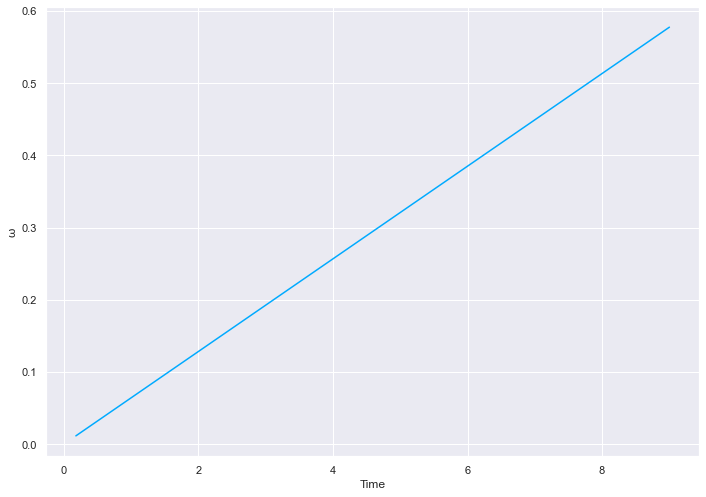

In [73]:
circular_motion(a=3,r=9,dt=9,specify="ang_v-t")